# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [2]:
#%pip install --upgrade plotly

## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [5]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
print(f"{df_hh_income.shape=}")
print(f"{df_pct_poverty.shape=}")
print(f"{df_pct_completed_hs.shape=}")
print(f"{df_share_race_city.shape=}")
print(f"{df_fatalities.shape=}")

df_hh_income.shape=(29322, 3)
df_pct_poverty.shape=(29329, 3)
df_pct_completed_hs.shape=(29329, 3)
df_share_race_city.shape=(29268, 7)
df_fatalities.shape=(2535, 14)


In [7]:
print(f"{df_hh_income.columns=}")
print(f"{df_pct_poverty.columns=}")
print(f"{df_pct_completed_hs.columns=}")
print(f"{df_share_race_city.columns=}")
print(f"{df_fatalities.columns=}")

df_hh_income.columns=Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
df_pct_poverty.columns=Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
df_pct_completed_hs.columns=Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
df_share_race_city.columns=Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
df_fatalities.columns=Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [8]:
# Checking for NaN values
print(f"{df_hh_income.isna().values.any()=}")
print(f"{df_pct_poverty.isna().values.any()=}")
print(f"{df_pct_completed_hs.isna().values.any()=}")
print(f"{df_share_race_city.isna().values.any()=}")
print(f"{df_fatalities.isna().values.any()=}")

df_hh_income.isna().values.any()=True
df_pct_poverty.isna().values.any()=False
df_pct_completed_hs.isna().values.any()=False
df_share_race_city.isna().values.any()=False
df_fatalities.isna().values.any()=True


In [9]:
# Checking for duplicate values
print(f"{df_hh_income.duplicated().values.any()=}")
print(f"{df_pct_poverty.duplicated().values.any()=}")
print(f"{df_pct_completed_hs.duplicated().values.any()=}")
print(f"{df_share_race_city.duplicated().values.any()=}")
print(f"{df_fatalities.duplicated().values.any()=}")

df_hh_income.duplicated().values.any()=False
df_pct_poverty.duplicated().values.any()=False
df_pct_completed_hs.duplicated().values.any()=False
df_share_race_city.duplicated().values.any()=False
df_fatalities.duplicated().values.any()=False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [10]:
df_hh_income.fillna(0, inplace=True)
df_hh_income.isna().values.any()

False

In [11]:
df_fatalities.fillna(0, inplace=True)
df_fatalities.isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [12]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [13]:
df_pct_poverty.sample(10)

,Geographic Area,City,poverty_rate
2128,CA,Camino CDP,11.9
26116,TX,Tilden CDP,7.4
28980,WI,Sherwood village,2.5
18932,ND,Grafton city,15.3
21021,OK,Stonewall town,37.2
26194,TX,Webberville village,23.1
23911,SD,Lemmon city,20.6
14650,MO,Westphalia city,7.6
13397,MS,Flowood city,10.1
9560,KS,Nickerson city,15.7


In [14]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].str.replace("-", "0.00")
df_pct_poverty["poverty_rate"] = pd.to_numeric(df_pct_poverty["poverty_rate"])
df_pct_poverty.sample(10)

,Geographic Area,City,poverty_rate
20010,OH,Ottawa village,8.10
2326,CA,East Los Angeles CDP,27.20
6146,IL,Belleville city,18.20
26645,VT,Groton CDP,18.30
13580,MS,Sharon CDP,6.40
12617,MN,Eden Valley city,10.80
7960,IN,Salem city,22.20
11399,MD,Taylors Island CDP,0.00
20775,OK,Leedey town,7.00
5770,HI,Mililani Mauka CDP,1.80


In [15]:
poverty_rate_by_state = df_pct_poverty.groupby(["Geographic Area"])["poverty_rate"].mean().reset_index(name="Poverty Rate").sort_values("Poverty Rate")
poverty_rate_by_state

,Geographic Area,Poverty Rate
31,NJ,8.16
50,WY,9.06
6,CT,9.14
19,MA,9.55
20,MD,10.27
39,RI,10.37
34,NY,11.64
44,UT,11.72
28,ND,12.13
12,IA,12.23


In [16]:
poverty_rate_by_state_bar_plot = px.bar(poverty_rate_by_state, x="Poverty Rate", y="Geographic Area", 
                                        color="Poverty Rate", title="Poverty Rate in each US State")
poverty_rate_by_state_bar_plot.update_layout(xaxis_title="Poverty Rate", yaxis_title="US State", coloraxis_showscale=False)
poverty_rate_by_state_bar_plot.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [17]:
df_pct_completed_hs.sample(10)

,Geographic Area,City,percent_completed_hs
14529,MO,Smithville city,94.5
18833,ND,Calio city,100
18556,NC,Porters Neck CDP,97.2
88,AL,Centreville city,81.6
12189,MI,Parchment city,89.9
21010,OK,Spencer city,83.2
5005,FL,West Miami city,80.3
4947,FL,Town 'n' Country CDP,86.7
18529,NC,Pantego town,91.7
23179,PA,West Falls CDP,93.3


In [18]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].str.replace("-", "0.00")
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])
df_pct_completed_hs.sample(10)

,Geographic Area,City,percent_completed_hs
2206,CA,Coachella city,51.20
13730,MO,Bigelow village,100.00
18201,NC,Davis CDP,96.30
3821,CO,Salida city,90.70
1040,AZ,Dennehotso CDP,74.40
1660,AR,Kirby CDP,81.30
4010,CT,Ridgefield CDP,98.10
11720,MI,Attica CDP,93.00
25162,TX,H. Cuellar Estates CDP,100.00
3338,CA,Upland city,89.10


In [19]:
hs_graduation_rate_by_state = df_pct_completed_hs.groupby(["Geographic Area"])["percent_completed_hs"].mean().reset_index(name="HS Graduation Rate").sort_values("HS Graduation Rate")
hs_graduation_rate_by_state

,Geographic Area,HS Graduation Rate
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


In [20]:
hs_graduation_rate_by_state_bar_plot = px.bar(hs_graduation_rate_by_state, x="HS Graduation Rate", y="Geographic Area", 
                                        color="HS Graduation Rate", color_continuous_scale=px.colors.sequential.Electric_r,
                                        title="High School Graduation Rate in each US State")
hs_graduation_rate_by_state_bar_plot.update_layout(xaxis_title="HS Graduation Rate", yaxis_title="US State", coloraxis_showscale=False)
hs_graduation_rate_by_state_bar_plot.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [21]:
merged_rates = pd.merge(poverty_rate_by_state, hs_graduation_rate_by_state, on="Geographic Area")

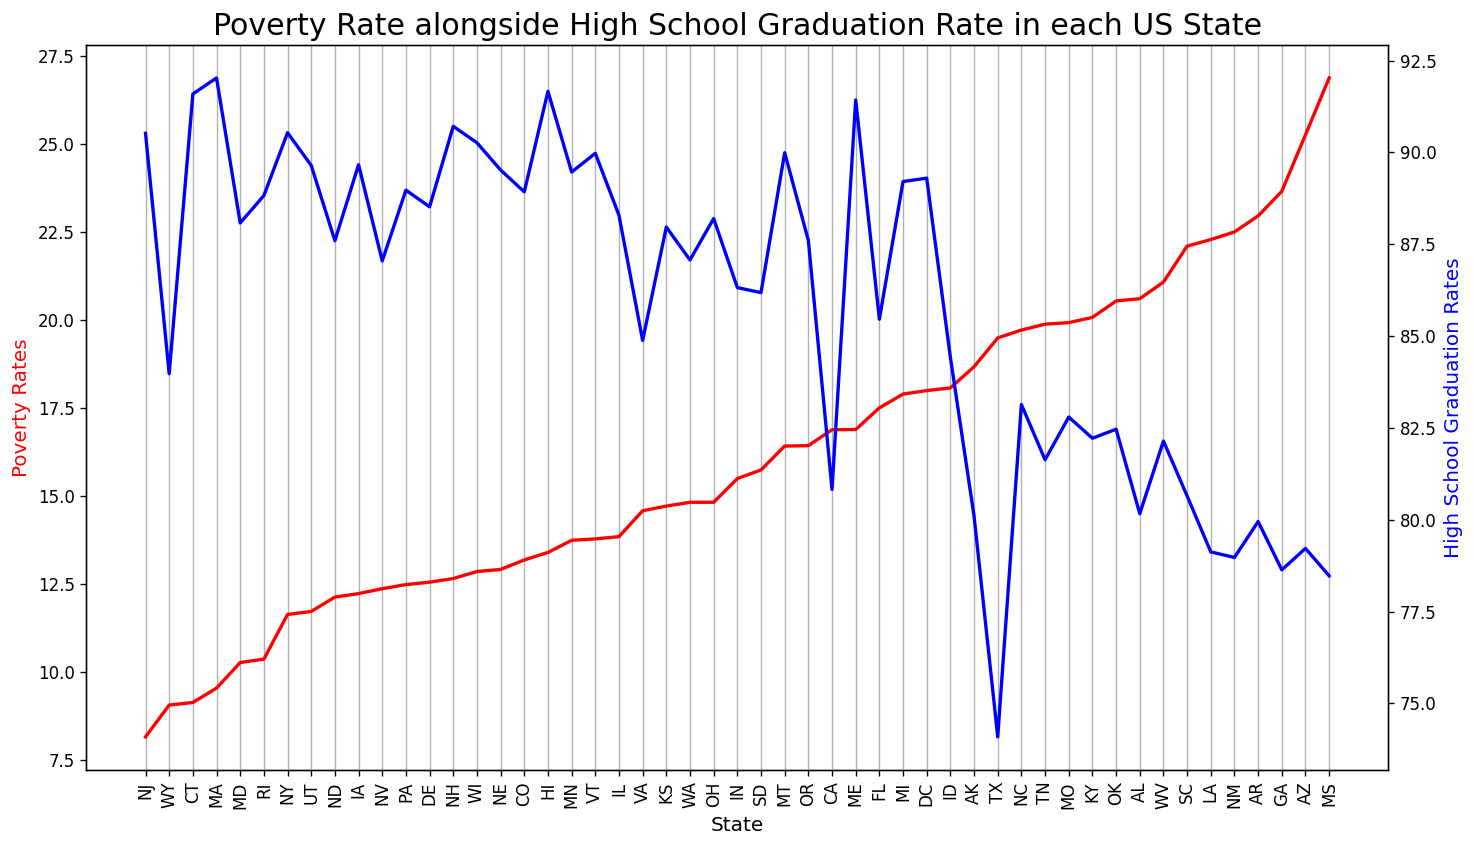

In [22]:
plt.figure(figsize=(14,8), dpi=120)
plt.title("Poverty Rate alongside High School Graduation Rate in each US State", fontsize=18)
plt.xticks(rotation=90)
plt.grid(True, "both", "x")

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlabel("State", fontsize=12)
ax1.set_ylabel("Poverty Rates", color="red", fontsize=12)
ax2.set_ylabel("High School Graduation Rates", color="blue", fontsize=12)

ax1.plot(merged_rates["Geographic Area"], merged_rates["Poverty Rate"], linewidth=2, color="red")
ax2.plot(merged_rates["Geographic Area"], merged_rates["HS Graduation Rate"], linewidth=2, color="blue")

plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

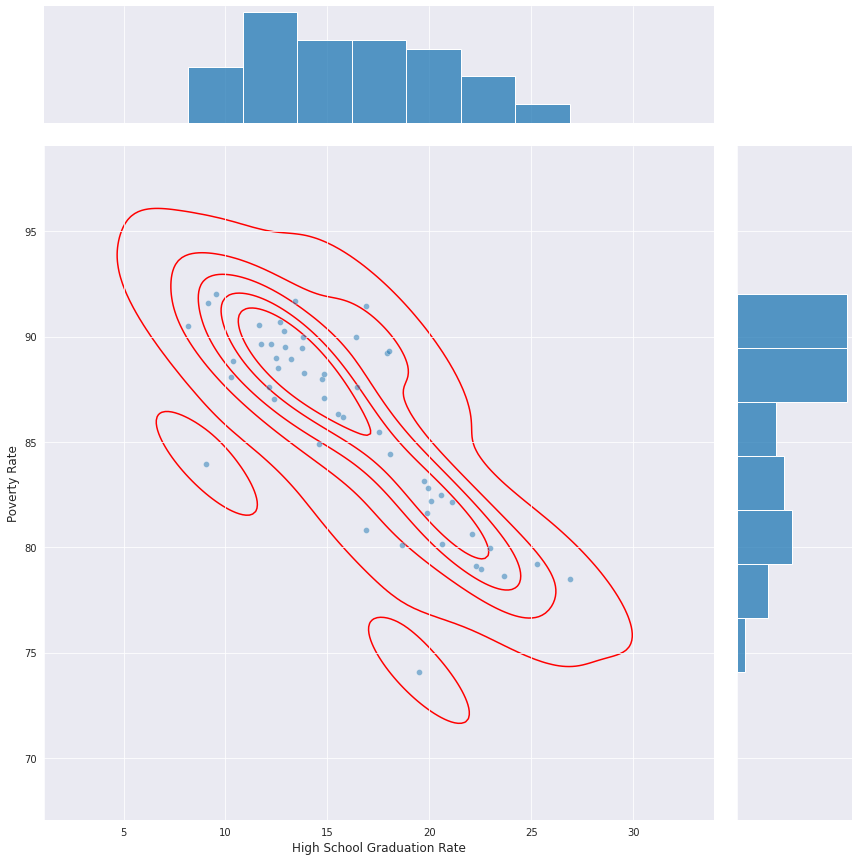

In [23]:
with sns.axes_style("darkgrid"): 
    h = sns.jointplot(data=merged_rates, x="Poverty Rate", y="HS Graduation Rate",
                      joint_kws={"alpha":0.5}, kind="scatter", height=12)
    h.ax_joint.set_xlabel("High School Graduation Rate", fontdict={"size": 12})
    h.ax_joint.set_ylabel("Poverty Rate", fontdict={"size": 12})
    h.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
    
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

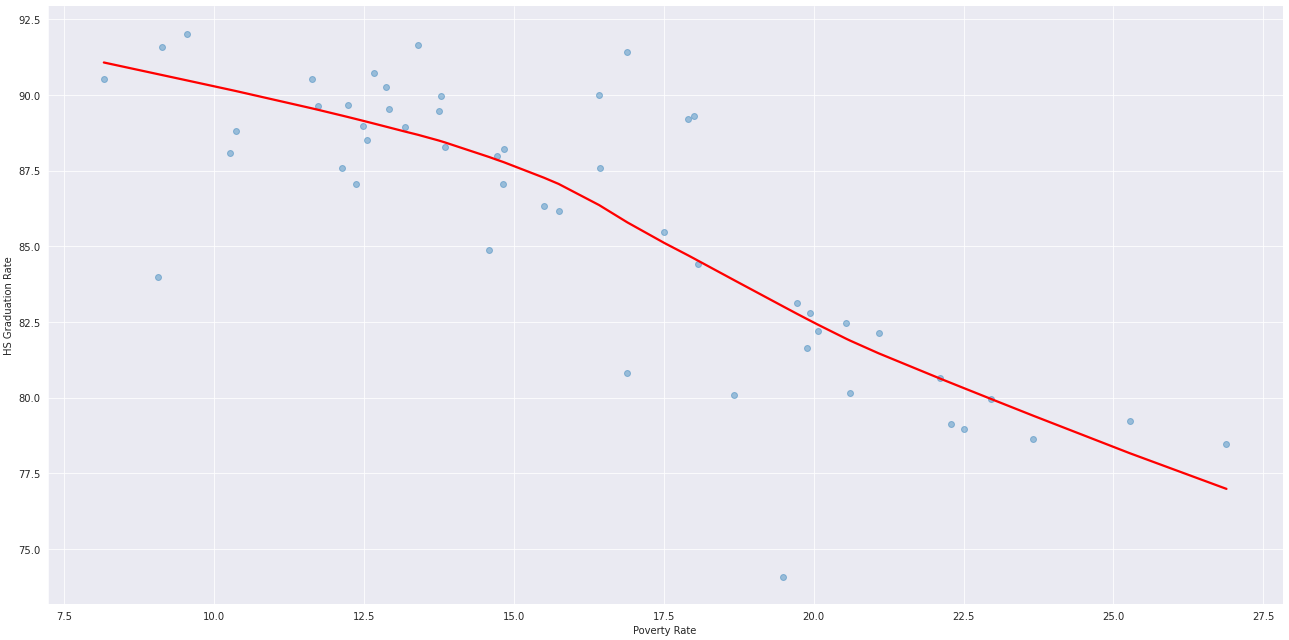

In [24]:
with sns.axes_style("darkgrid"):
    h = sns.lmplot(data=merged_rates, x="Poverty Rate", y="HS Graduation Rate", aspect=2, height=9,
                    lowess=True, scatter_kws = {"alpha": 0.4}, line_kws={"color": "r"})    
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [25]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [26]:
df_share_race_city.sample(10)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
5053,GA,Alapaha town,36.2,61.5,0.1,0.1,3.4
2016,CA,Belden CDP,90.9,0,0,0,0
13686,MO,Barnhart CDP,97.4,0.5,0.3,0.4,2.1
26697,VA,Basye CDP,94.9,1.4,0.4,0.2,2.9
15159,NE,Crete city,70.6,1,0.5,2.5,35.7
11542,MA,Middleborough Center CDP,93.4,1.8,0.4,1.5,2.2
3292,CA,Thousand Palms CDP,74.7,1.4,1,1.7,52.5
15483,NE,St. Helena village,99,0,1,0,0
7456,IN,Bicknell city,97.6,0.5,0.2,0.2,1.9
1994,CA,Avilla Beach CDP,92.6,0.8,0.4,2,6.8


In [27]:
df_share_race_city["share_white"] = df_share_race_city["share_white"].str.replace(r"[(X)]", "0")
df_share_race_city["share_black"] = df_share_race_city["share_black"].str.replace(r"[(X)]", "0")
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].str.replace(r"[(X)]", "0")
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].str.replace(r"[(X)]", "0")
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].str.replace(r"[(X)]", "0")

df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])

df_share_race_city.sample(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_348\1770178693.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USER\AppData\Local\Temp\ipykernel_348\1770178693.py:2: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USER\AppData\Local\Temp\ipykernel_348\1770178693.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USER\AppData\Local\Temp\ipykernel_348\1770178693.py:4: FutureWarning:

The default value of regex will change from True to False in a future version.

C:\Users\USER\AppData\Local\Temp\ipykernel_348\1770178693.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
16202,NJ,Perth Amboy city,50.30,10.50,1.10,1.70,78.10
19668,OH,Kimbolton CDP,97.90,0.00,0.00,0.00,0.00
21237,OR,Idanha city,96.30,0.00,0.00,0.00,5.20
7480,IN,Bruceville town,95.60,0.20,0.40,1.00,2.10
24295,TN,Middleton city,79.90,17.10,0.40,0.70,1.30
26228,UT,Alta town,93.50,0.00,0.30,1.30,4.20
11720,MI,Bear Lake village,94.10,0.00,3.10,0.00,1.40
10436,LA,Epps village,46.50,50.50,0.70,0.10,5.90
6411,IL,Effingham city,96.00,0.40,0.20,0.70,3.20
28279,WV,Wheeling city,91.20,5.10,0.20,0.90,0.90


In [28]:
avg_racial_population = df_share_race_city.groupby(["Geographic area"]).agg({"share_white": "mean",
                                                                             "share_black": "mean",
                                                                             "share_native_american": "mean",
                                                                             "share_asian": "mean",
                                                                             "share_hispanic": "mean"})
avg_racial_population.head()

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.26,0.56,45.48,1.38,2.13
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.54,2.68,1.72,5.54,29.51


In [29]:
racial_makeup_bar = px.bar(avg_racial_population, x=avg_racial_population.index,
                            y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
                            title="Racial Makeup of Each US State")
racial_makeup_bar.update_layout(xaxis_title="State", yaxis_title="Percentage")
racial_makeup_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [30]:
racial_spread = avg_racial_population.value_counts().reset_index()
racial_spread = racial_spread.mean().reset_index(name="Percentage").drop([5])
racial_spread

,index,Percentage
0,share_white,80.93
1,share_black,7.83
2,share_native_american,3.60
3,share_asian,1.84
4,share_hispanic,7.74


In [31]:
racial_spread_pie = px.pie(racial_spread, labels="index", values="Percentage",
                            names="index", title="Percentage Deaths per Race")
racial_spread_pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [32]:
df_fatalities.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2163,2410,Jesus Alberto Geney,09/03/17,shot and Tasered,knife,24.00,M,H,Santa Clara,CA,True,other,0,False
1786,1997,Thad Demarco Hale,27/10/16,shot,gun and knife,33.00,M,B,San Antonio,TX,False,other,Not fleeing,False
1372,1562,Vernell Bing,22/05/16,shot,unarmed,22.00,M,B,Jacksonville,FL,False,other,Car,False
717,850,Steven McKenny,21/09/15,shot and Tasered,unarmed,21.00,M,W,Paris,TX,False,attack,Not fleeing,False
1610,1801,Trenton Lohman,18/08/16,shot,gun,38.00,M,W,Poway,CA,False,attack,Car,False
17,36,Artago Damon Howard,08/01/15,shot,unarmed,36.00,M,B,Strong,AR,False,attack,Not fleeing,False
1378,1565,Derek Prophet,25/05/16,shot,knife,43.00,M,W,Oklahoma City,OK,True,other,Not fleeing,False
2038,2274,Mi'Chance Dunlap-Gittens,28/01/17,shot,gun,17.00,M,B,Des Moines,WA,False,attack,Not fleeing,False
840,988,James Francis Smyth,06/11/15,shot,vehicle,55.00,M,W,Las Vegas,NV,False,other,Car,False
90,129,Herbert Hill,06/02/15,shot,gun,25.00,M,B,Oklahoma City,OK,False,attack,Not fleeing,False


In [33]:
df_gender = df_fatalities["gender"].value_counts().reset_index(name="count")
df_gender

,index,count
0,M,2428
1,F,107


In [34]:
gender_death_bar = px.bar(df_gender, x="index", y="count",
                          color="count", title="Number of Deaths per gender")
gender_death_bar.update_layout(xaxis_title="Gender", yaxis_title="Deaths", coloraxis_showscale=False)
gender_death_bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [35]:
age_manner_by_gender_box = px.box(df_fatalities, x="gender", y="age",
                                  color="manner_of_death", title="Age and Manner of Death by Gender")
age_manner_by_gender_box.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [36]:
df_arms = df_fatalities["armed"].value_counts().reset_index(name="count")
df_arms

,index,count
0,gun,1398
1,knife,373
2,vehicle,177
3,unarmed,171
4,undetermined,117
...,...,...
64,straight edge razor,1
65,baseball bat and fireplace poker,1
66,bean-bag gun,1
67,chain,1


In [37]:
arm_count_bar = px.bar(x=df_arms["index"], y=df_arms["count"], title="Weapon Count")
arm_count_bar.update_layout(xaxis_title="Weapon", yaxis_title="Count")
arm_count_bar.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [38]:
pct_under_25 = len(df_fatalities[df_fatalities["age"] < 25]) / len(df_fatalities) * 100
print(f"Percentage of people under 25 killed is {pct_under_25:.2f}%")

Percentage of people under 25 killed is 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

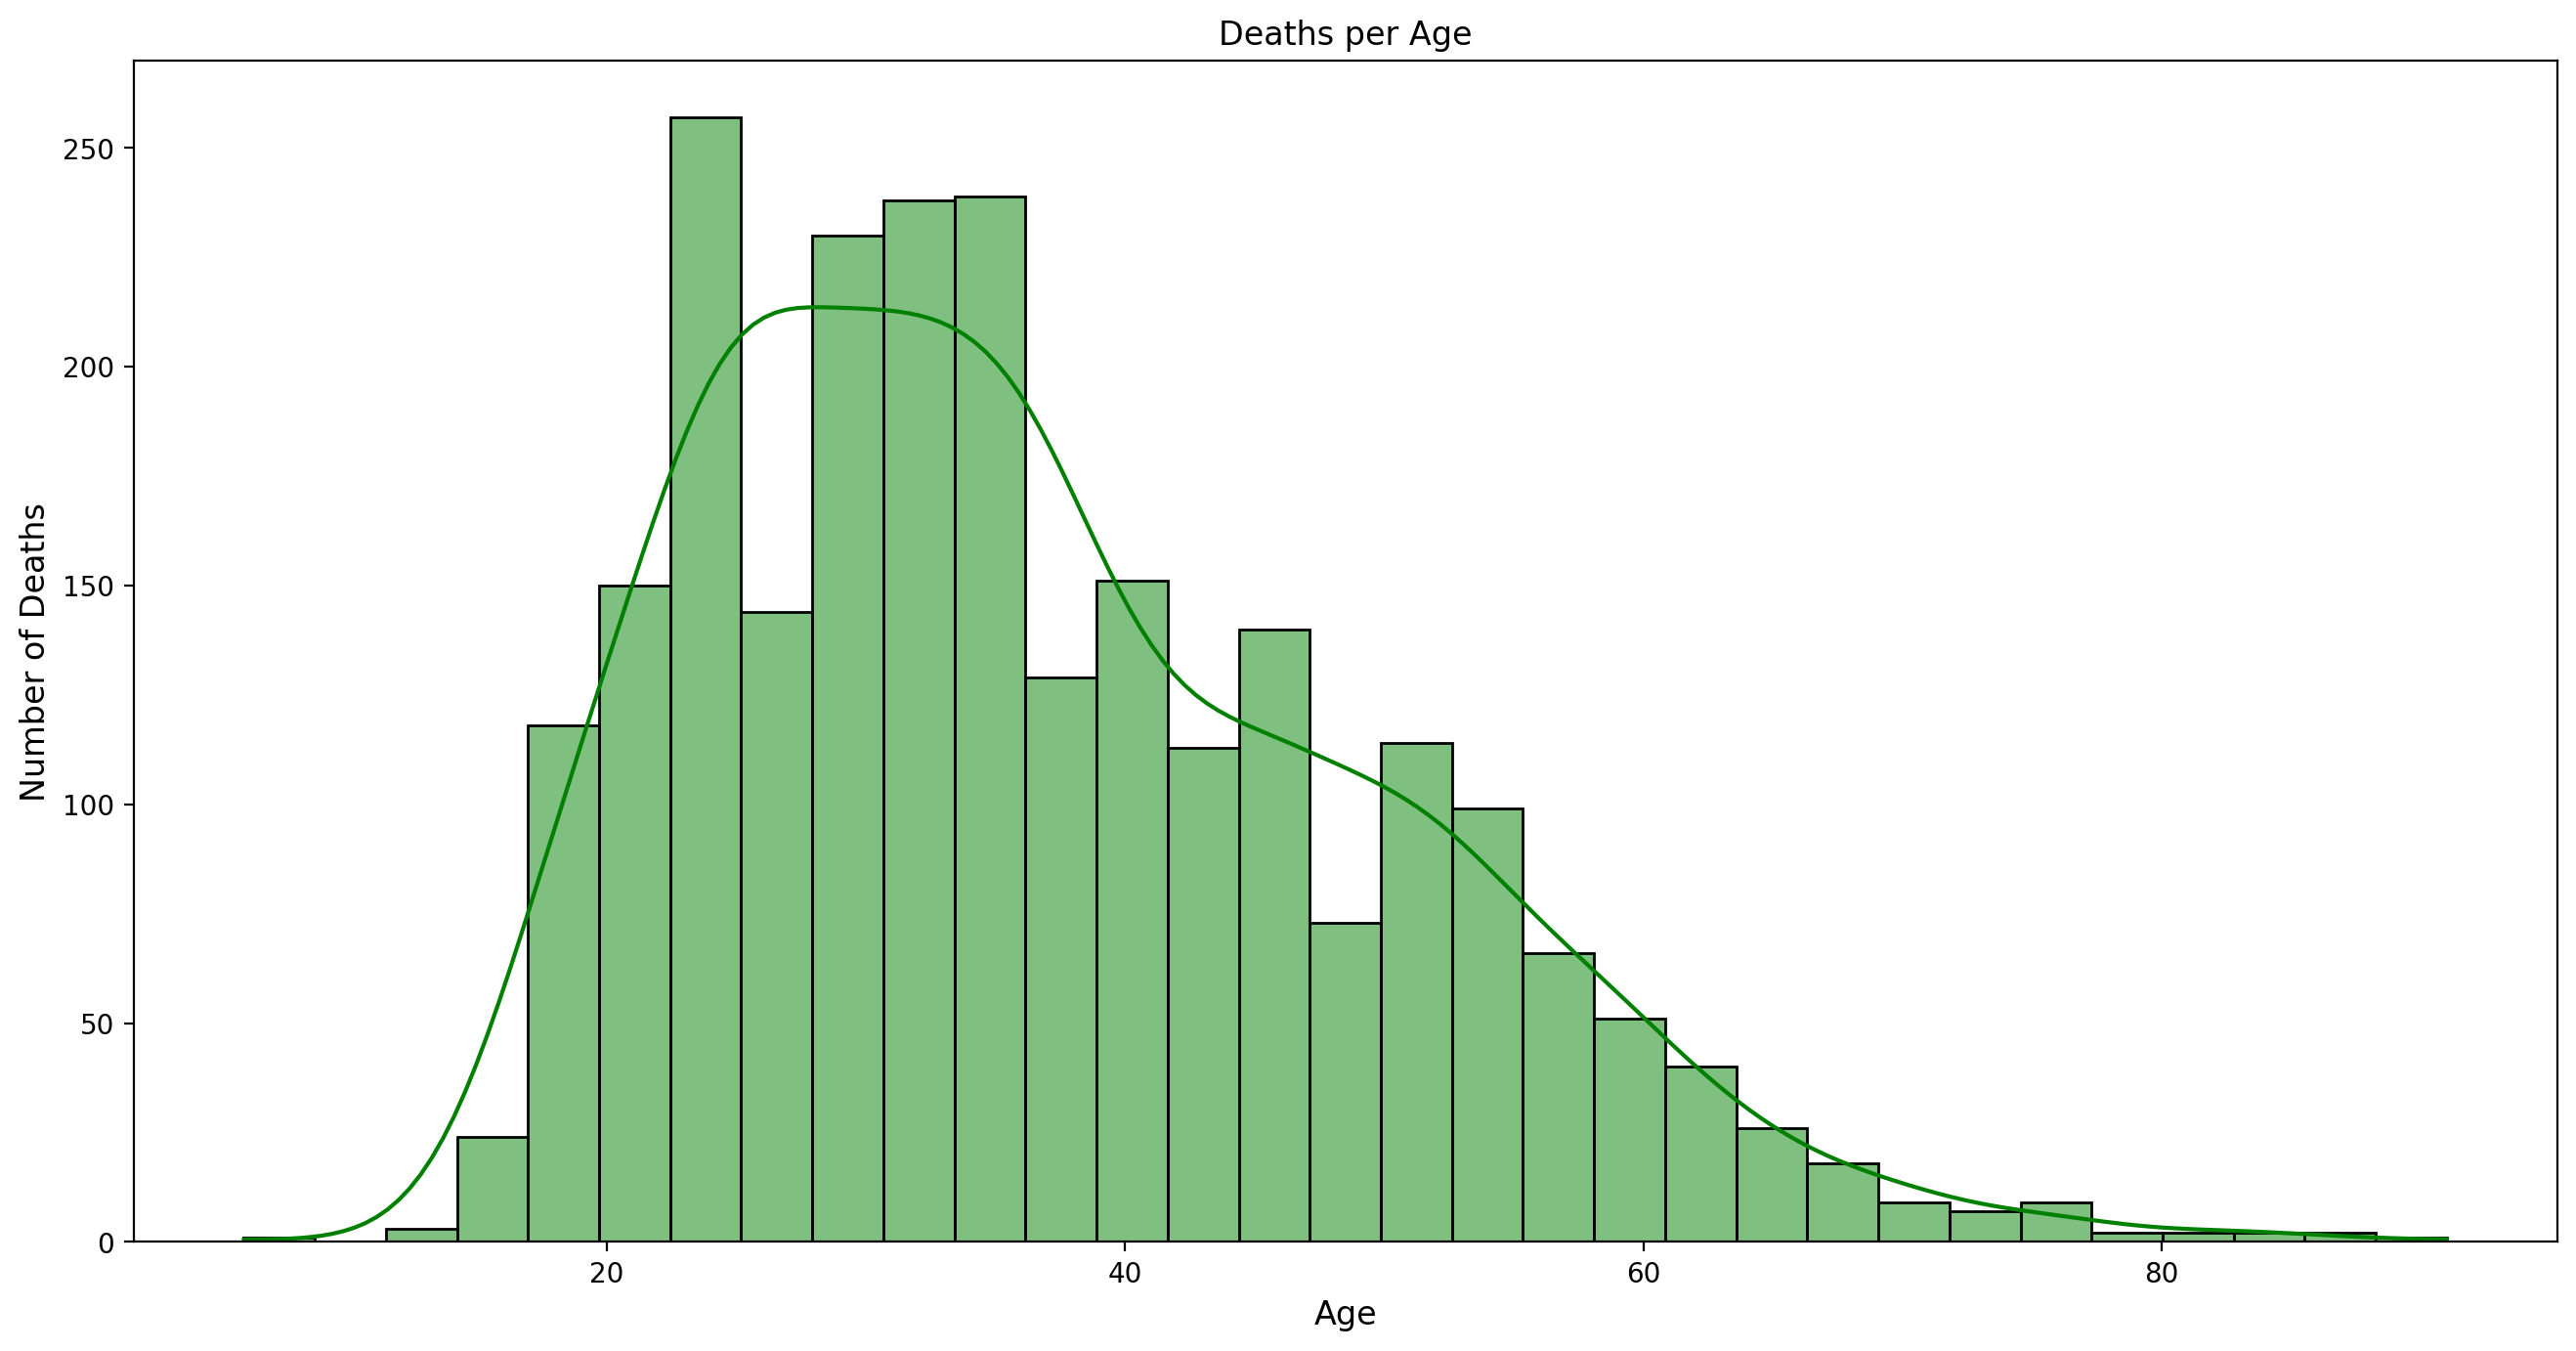

In [39]:
plt.figure(figsize=(16,8), dpi=200)
h = sns.histplot(df_fatalities[df_fatalities["age"] != 0], x="age", kde=True, color="green")

h.set_xlabel("Age", fontdict={"size": 12})
h.set_ylabel("Number of Deaths", fontdict={"size": 12})
h.set_title("Deaths per Age")
    
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

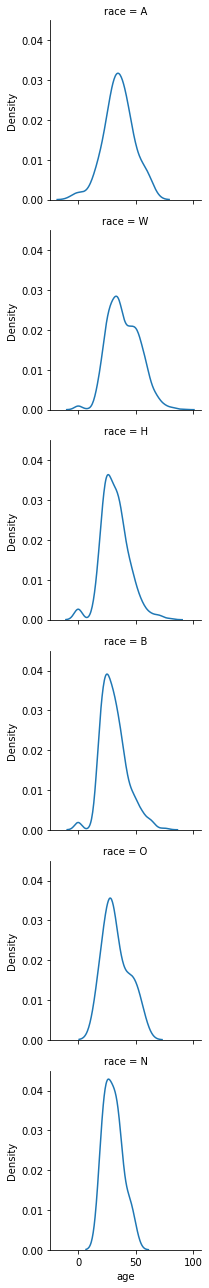

In [40]:
k = sns.FacetGrid(df_fatalities[df_fatalities.race != 0], row="race")
k.map(sns.kdeplot, "age")

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [41]:
death_by_race = df_fatalities.groupby(["race"]).size().reset_index(name="count")
death_by_race

,race,count
0,0,195
1,A,39
2,B,618
3,H,423
4,N,31
5,O,28
6,W,1201


In [42]:
death_by_race_bar = px.bar(death_by_race, x="race", y="count", color="count", title="Race of People Killed")
death_by_race_bar.update_layout(xaxis_title="Race", yaxis_title="Number of Deaths", coloraxis_showscale=False)
death_by_race_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [43]:
df_mental_state = df_fatalities["signs_of_mental_illness"].value_counts().reset_index(name="count")
df_mental_state

,index,count
0,False,1902
1,True,633


In [44]:
mental_state_pie = px.pie(names=df_mental_state["index"], labels=df_mental_state["index"],
                          values=df_mental_state["count"], title="Mental Illness and Police Killings")
mental_state_pie.update_traces(textinfo="percent+label")
mental_state_pie.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [45]:
top_10_dangerous_cities = df_fatalities["city"].value_counts()[:10].reset_index(name="count")
top_10_dangerous_cities

,index,count
0,Los Angeles,39
1,Phoenix,31
2,Houston,27
3,Chicago,25
4,Las Vegas,21
5,San Antonio,20
6,Columbus,19
7,Austin,18
8,Miami,18
9,St. Louis,15


In [46]:
dangerous_cities_bar = px.bar(x=top_10_dangerous_cities["count"], y=top_10_dangerous_cities["index"],
                              color= top_10_dangerous_cities["count"], title="Top 10 Dangerous Cities")
dangerous_cities_bar.update_layout(xaxis_title="Number Of Deaths", yaxis_title="City", coloraxis_showscale=False)
dangerous_cities_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [47]:
df_top_10_cities = df_fatalities[df_fatalities["city"].isin(top_10_dangerous_cities["index"])]
df_top_10_cities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
12,22,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.00,M,B,Columbus,OH,True,other,Not fleeing,False
40,75,Pablo Meza,17/01/15,shot,gun,24.00,M,H,Los Angeles,CA,False,attack,Not fleeing,False
48,90,Isaac Holmes,21/01/15,shot,gun,19.00,M,B,St. Louis,MO,False,attack,Not fleeing,False
52,336,Robert Francis Mesch,23/01/15,shot,gun,61.00,M,W,Austin,TX,True,attack,Not fleeing,False
64,348,Nicolas Leland Tewa,27/01/15,shot,vehicle,26.00,M,N,Phoenix,AZ,False,other,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,2793,Isaiah Perkins,20/07/17,shot,gun,27.00,M,B,St. Louis,MO,False,attack,Car,False
2515,2798,Jerrod Kershaw,24/07/17,shot,gun,31.00,M,W,St. Louis,MO,True,attack,Car,False
2520,2804,TK TK,26/07/17,shot,gun,35.00,M,0,Phoenix,AZ,False,attack,Other,False
2521,2806,TK TK,26/07/17,shot,gun,0.00,M,0,San Antonio,TX,False,attack,Not fleeing,False


In [48]:
df_race_per_city = df_top_10_cities.groupby(["city", "race"]).size().reset_index(name="count")
df_race_per_city

,city,race,count
0,Austin,B,3
1,Austin,H,2
2,Austin,W,13
3,Chicago,0,1
4,Chicago,B,21
5,Chicago,H,1
6,Chicago,W,2
7,Columbus,0,1
8,Columbus,B,11
9,Columbus,O,1


In [49]:
race_per_city_bar = px.bar(x=df_race_per_city["count"], y=df_race_per_city["city"], 
                            color=df_race_per_city["race"], title="Top 10 Citites by Police Killings",)
race_per_city_bar.update_layout(xaxis_title="Number of Deaths", yaxis_title="City")
race_per_city_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [50]:
df_states = df_fatalities["state"].value_counts().reset_index(name="count")
df_states

,index,count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [51]:
fig = px.choropleth(df_states, locations="index", color="count", 
                    locationmode="USA-states", scope="usa", color_continuous_scale=px.colors.sequential.algae,
                    title="Police Killings by US State")
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [52]:
df_fatalities["date"].describe()

count         2535
unique         879
top       24/01/17
freq             8
Name: date, dtype: object

In [53]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities["date"].describe()

C:\Users\USER\AppData\Local\Temp\ipykernel_348\3430354322.py:2: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    2535
unique                    879
top       2017-01-24 00:00:00
freq                        8
first     2015-01-03 00:00:00
last      2017-12-07 00:00:00
Name: date, dtype: object

In [54]:
deaths_overtime = df_fatalities.sort_values("date")
deaths_overtime.sample(10)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1105,1273,David Glen Watson,2016-12-02,shot,gun,53.00,M,W,Fort Worth,TX,False,other,Not fleeing,False
1782,1993,Brandon Millard,2016-10-25,shot,knife,37.00,M,W,Lincoln,CA,True,other,Not fleeing,False
1500,1685,TK TK,2016-04-07,shot,knife,0.00,M,0,Rosser,TX,False,other,Not fleeing,True
2229,2483,Austin Dakota Snyder,2017-05-04,shot,vehicle,22.00,M,W,Little Rock,AR,False,other,0,False
404,513,Rudy Baca,2015-03-06,shot and Tasered,unarmed,36.00,M,H,Los Lunas,NM,False,attack,Not fleeing,False
1238,1418,Deriante Deon Miller,2016-03-27,shot,gun,18.00,M,B,Kinston,NC,False,other,Not fleeing,False
1084,1246,Blake Edward Fitzgerald,2016-05-02,shot,gun,30.00,M,W,Milton,FL,False,other,Car,False
155,195,Hung Trieu,2015-01-03,shot,gun,35.00,M,A,Houston,TX,False,attack,Not fleeing,False
2107,2359,Joshua Henry,2017-02-17,shot,unarmed,30.00,M,W,Grand Prarie,TX,True,attack,Not fleeing,True
2251,2520,Isaiah Murrietta-Golding,2017-04-15,shot,undetermined,16.00,M,H,Fresno,CA,False,undetermined,Not fleeing,True


In [55]:
line = px.line(x=deaths_overtime["date"])
line.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).